In [1]:
import pandas as pd

import numpy as np

df = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

In [2]:
df.head(5)

print(df['Attack_type'].value_counts())

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64


In [3]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
DDoS_HTTP                10495
SQL_injection            10282
DDoS_TCP                 10247
Uploading                10214
Vulnerability_scanner    10062
Password                  9972
Backdoor                  9865
Ransomware                9689
XSS                       9543
Port_Scanning             8921
Fingerprinting             853
MITM                       358
Name: Attack_type, dtype: int64


In [4]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [5]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,dns.qry.name.len-_googlecast._tcp.local,mqtt.conack.flags-0,mqtt.conack.flags-0.0,mqtt.conack.flags-0x00000000,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
54750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.610000e+02,3.537984e+09,...,0,0,1,0,0,1,0,0,1,0
44691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.458321e+09,1.458321e+09,...,0,0,1,0,0,1,0,0,1,0
82590,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,1.435700e+04,1.368347e+08,...,0,0,1,0,0,1,0,0,1,0
75875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.519400e+04,1.588869e+09,...,0,0,1,0,0,1,0,0,1,0
116271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.900000e+01,1.006093e+09,...,0,1,0,0,1,0,0,1,0,0
22421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,1,0,0,1,0,0,1,0
46674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210000e+02,1.840877e+09,...,0,0,1,0,0,1,0,0,1,0
43737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,3.434128e+09,...,0,0,1,0,0,1,0,0,1,0


In [6]:
df = df[~(df['Attack_type'] == 'DDoS_HTTP')]

In [7]:
df = df[~(df['Attack_type'] == 'DDoS_TCP')]

In [8]:
df = df[~(df['Attack_type'] == 'Fingerprinting')]
df = df[~(df['Attack_type'] == 'Password')]
df = df[~(df['Attack_type'] == 'Uploading')]
df = df[~(df['Attack_type'] == 'Backdoor')]

In [9]:
df['Attack_type'].value_counts()

Normal                   24101
DDoS_UDP                 14498
DDoS_ICMP                13096
SQL_injection            10282
Vulnerability_scanner    10062
Ransomware                9689
XSS                       9543
Port_Scanning             8921
MITM                       358
Name: Attack_type, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100550 entries, 82590 to 109524
Data columns (total 76 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   arp.opcode                                                                         100550 non-null  float64
 1   arp.hw.size                                                                        100550 non-null  float64
 2   icmp.checksum                                                                      100550 non-null  float64
 3   icmp.seq_le                                                                        100550 non-null  float64
 4   icmp.unused                                                                        100550 non-null  float64
 5   http.content_length                                                                100550

In [11]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'icmp.unused',
 'http.content_length',
 'http.response',
 'http.tls_port',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'htt

In [12]:
len(feat_cols)

75

In [13]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [16]:
df[skip_list[3]].value_counts()

0.0    100550
Name: mqtt.msg_decoded_as, dtype: int64

In [17]:
df.drop(skip_list, axis=1, inplace=True)
feat_cols = list(df.columns)
feat_cols.remove(label_col)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
 'http.referer-0',
 'http.referer-0.0',
 'http.referer-127.0.0.1',
 'http.reques

In [18]:
X = df.drop([label_col], axis=1)
y = df[label_col]

del df

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [20]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [21]:
label_encoder.classes_

array(['DDoS_ICMP', 'DDoS_UDP', 'MITM', 'Normal', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Vulnerability_scanner', 'XSS'],
      dtype=object)

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [23]:
%load_ext tensorboard
from datetime import datetime
from packaging import version
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:

model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(71,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

In [26]:
model.save_weights('./checkpoints/') # to save weights in the middle of a session

In [27]:
# Compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [29]:
#fitting the model
training_history = model.fit(X_train, y_train, epochs=100, batch_size=256,verbose=0,validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback])

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor="val_loss",
# 										mode="min", patience=0,
# 										restore_best_weights=True)

# history = model.fit(X_train, y_train, batch_size=256,
# 					epochs=50, validation_data=(X_test, y_test),
# 					callbacks=[earlystopping])


In [30]:
print("Average test loss: ", np.average(training_history.history['loss']))

Average test loss:  0.0828935045003891


In [31]:
training_history.history['loss']

[0.2425527572631836,
 0.10423126816749573,
 0.10075387358665466,
 0.09831558167934418,
 0.09744317829608917,
 0.09697166830301285,
 0.09691125899553299,
 0.0958891212940216,
 0.09490944445133209,
 0.09444039314985275,
 0.09469665586948395,
 0.09425649046897888,
 0.09441138058900833,
 0.0942162349820137,
 0.09376274049282074,
 0.09387316554784775,
 0.09361898899078369,
 0.09310990571975708,
 0.0932857096195221,
 0.09318333119153976,
 0.09411066025495529,
 0.09183827042579651,
 0.09229184687137604,
 0.09156813472509384,
 0.09209249168634415,
 0.09067918360233307,
 0.08946046233177185,
 0.08821391314268112,
 0.0864640474319458,
 0.0839255228638649,
 0.08351488411426544,
 0.08113657683134079,
 0.08556295186281204,
 0.08212482184171677,
 0.07987794280052185,
 0.08155310153961182,
 0.08063172549009323,
 0.07978669553995132,
 0.08054398000240326,
 0.07868153601884842,
 0.07875735312700272,
 0.07996249943971634,
 0.0798298791050911,
 0.07793740183115005,
 0.07931544631719589,
 0.07936578989028

In [32]:
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 17036), started 3 days, 10:48:37 ago. (Use '!kill 17036' to kill it.)

In [33]:
model.save('Weights/Model_1')  # to save weights as an entire weights

INFO:tensorflow:Assets written to: Weights/Model_1\assets


In [34]:
model.evaluate(X_test, y_test,256)

79/79 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9772


[0.06678266823291779, 0.9772252440452576]

In [35]:
y_pred = model.predict(X_test,256)
y_pred = np.argmax(y_pred,axis = 1)
y_pred

array([3, 3, 8, ..., 1, 8, 3], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9772252610641472

In [37]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[2619    0    0    0    0    0    0    0    0]
 [   0 2900    0    0    0    0    0    0    0]
 [   0    0   72    0    0    0    0    0    0]
 [   0    0    0 4820    0    0    0    0    0]
 [   0    0    0    0 1782    2    0    0    0]
 [   0    0    0    0   64 1874    0    0    0]
 [   0    0    0    0    0    0 2056    0    0]
 [   0    0    0    0    0    0    0 1741  271]
 [   0    0    0    0    0    0    0  121 1788]]


Confusion Matrix


<AxesSubplot:>

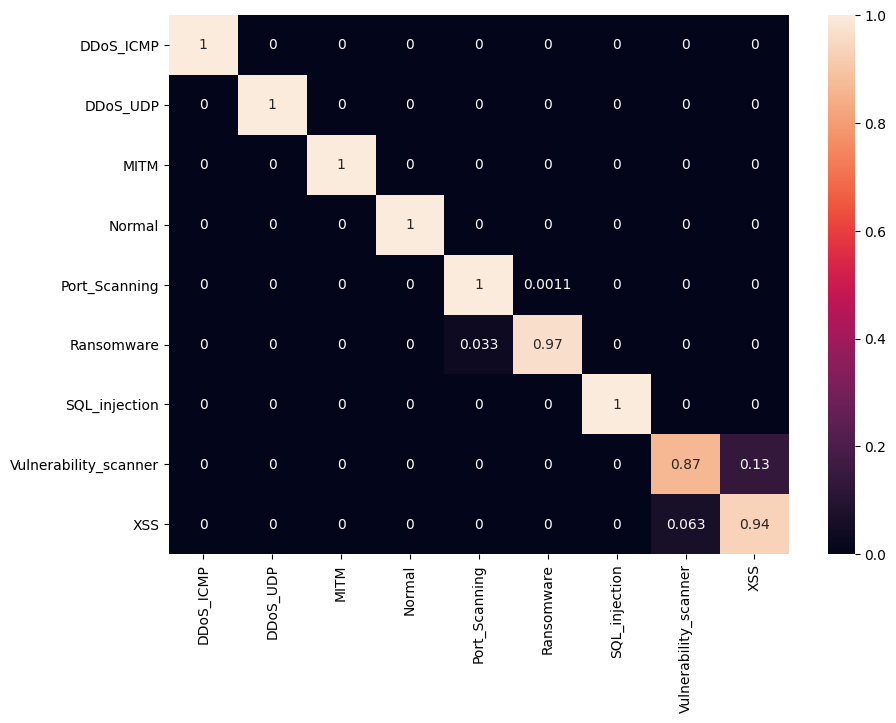

In [38]:
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                    columns = [i for i in label_encoder.classes_])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [39]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average='weighted')

0.9778258788973899

In [40]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred, average='weighted')

0.9772252610641472

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.9772176733286734

In [64]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
